# Names Database

#### connect to pcc server

In [54]:
connection = pyodbc.connect(
    server='cisdbss.pcc.edu',
    database='NAMES',
    user='275student',
    password='275student',
    driver='{ODBC Driver 17 for SQL Server}'
)

connection

#### SQL querry function

In [55]:
def nameQuery(name):
     df = pd.read_sql("""
     SELECT Name, Gender, Year, NameCount
     FROM all_data
     WHERE Name = ?
     AND (Gender = 'M' OR
     Gender = 'F')
     ORDER BY Year
     """, connection, params=(name,))
     return df
    
name1 = nameQuery('Tracy')
name1.head()

,Name,Gender,Year,NameCount
0,Tracy,F,1915.0,18.0
1,Tracy,M,1915.0,49.0
2,Tracy,F,1916.0,26.0
3,Tracy,M,1916.0,72.0
4,Tracy,F,1917.0,28.0


#### List the names with least difference between genders

In [56]:
df = pd.read_sql("""
SELECT MaleData.Name,
       MaleData.Year,
       MaleData.NameCount AS Male,
       FemaleData.NameCount AS Female,
       ABS( MaleData.NameCount - FemaleData.NameCount) AS DIFF
FROM   all_data AS MaleData,
       all_data AS FemaleData
WHERE  MaleData.Gender = 'M'
AND    FemaleData.Gender = 'F'
AND    MaleData.Name = FemaleData.Name
AND    MaleData.Year = FemaleData.Year
ORDER BY DIFF ASC, Male DESC
""", connection)
df.head(200)


,Name,Year,Male,Female,DIFF
0,Justice,2003.0,665.0,665.0,0.0
1,Jaylin,2008.0,524.0,524.0,0.0
2,Baby,2003.0,245.0,245.0,0.0
3,Marion,1977.0,229.0,229.0,0.0
4,Dusty,1979.0,194.0,194.0,0.0
...,...,...,...,...,...
195,Anmol,2005.0,18.0,18.0,0.0
196,Cypress,2006.0,18.0,18.0,0.0
197,Jazz,2004.0,18.0,18.0,0.0
198,Jalani,2008.0,18.0,18.0,0.0


#### get info about datatypes

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150447 entries, 0 to 150446
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    150447 non-null  object 
 1   Year    150447 non-null  float64
 2   Male    150447 non-null  float64
 3   Female  150447 non-null  float64
 4   DIFF    150447 non-null  float64
dtypes: float64(4), object(1)
memory usage: 5.7+ MB


#### SQL querry for 'Baby'

In [58]:
name1 = nameQuery('Baby')
name1.head()

,Name,Gender,Year,NameCount
0,Baby,F,1915.0,7.0
1,Baby,F,1916.0,10.0
2,Baby,F,1917.0,10.0
3,Baby,F,1918.0,8.0
4,Baby,F,1919.0,11.0


#### plot for 'Baby'

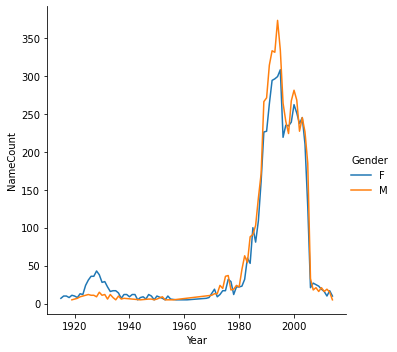

In [59]:
sns.relplot(data=name1, kind='line', x='Year', y='NameCount', hue='Gender')

#### querry for gender year totals

In [60]:
babies_registered = pd.read_sql_query("""
SELECT *
FROM year_gender_totals;
""", connection)
babies_registered.head()

,YearGenderTotalID,Year,Gender,Total
0,1.0,1915.0,F,983874.0
1,2.0,1915.0,M,848603.0
2,3.0,1916.0,F,1044323.0
3,4.0,1916.0,M,890099.0
4,5.0,1917.0,F,1081280.0


#### set index for tables to join

In [61]:
name1.set_index(["Year", "Gender"], inplace=True)
print(name1.head())
babies_registered.set_index(["Year", "Gender"], inplace=True)
print(babies_registered.head())

               Name  NameCount
Year   Gender                 
1915.0 F       Baby        7.0
1916.0 F       Baby       10.0
1917.0 F       Baby       10.0
1918.0 F       Baby        8.0
1919.0 F       Baby       11.0
               YearGenderTotalID      Total
Year   Gender                              
1915.0 F                     1.0   983874.0
       M                     2.0   848603.0
1916.0 F                     3.0  1044323.0
       M                     4.0   890099.0
1917.0 F                     5.0  1081280.0


#### join data

In [62]:
name1 = name1.join(babies_registered)
name1["Percent"] = 100.0 * name1['NameCount'] / name1['Total']
name1

Name  NameCount  YearGenderTotalID      Total   Percent
Year   Gender                                                         
1915.0 F       Baby        7.0                1.0   983874.0  0.000711
1916.0 F       Baby       10.0                3.0  1044323.0  0.000958
1917.0 F       Baby       10.0                5.0  1081280.0  0.000925
1918.0 F       Baby        8.0                7.0  1157647.0  0.000691
1919.0 F       Baby       11.0                9.0  1130145.0  0.000973
...             ...        ...                ...        ...       ...
2012.0 M       Baby       19.0              196.0  1889414.0  0.001006
2013.0 F       Baby       17.0              197.0  1745339.0  0.000974
       M       Baby       15.0              198.0  1881463.0  0.000797
2014.0 F       Baby       10.0              199.0  1768775.0  0.000565
       M       Baby        5.0              200.0  1901376.0  0.000263

[162 rows x 5 columns]

### Line plot of babies named "Baby"

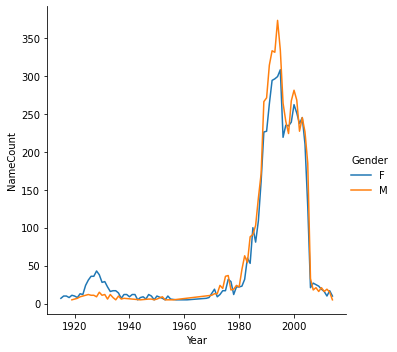

In [63]:
baby = sns.relplot(data=name1, kind='line', x='Year', y='NameCount', hue='Gender')

#### saving file as svg

In [64]:
baby.savefig('baby.svg')